In [1]:
pip install xarray netCDF4 cartopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Try opening with explicit engine
ds = xr.open_dataset('ERA5_2023_06/data_stream-oper_stepType-accum.nc', engine='netcdf4')

In [3]:
# Let's first examine the dataset structure
print("Dataset info:")
print(ds)

# List all variables
print("\nAvailable variables:")
print(list(ds.variables))

Dataset info:
<xarray.Dataset>
Dimensions:     (valid_time: 120, latitude: 49, longitude: 105)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2023-06-01 ... 2023-06-30T18:00:00
  * latitude    (latitude) float64 60.0 59.75 59.5 59.25 ... 48.5 48.25 48.0
  * longitude   (longitude) float64 -139.0 -138.8 -138.5 ... -113.2 -113.0
    expver      (valid_time) object ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-11T01:18 GRIB to CDM+CF via cfgrib-0.9.1...

Available variables:
['number', 'valid_time', 'latitude', 'longitude', 'expver', 'tp']


In [2]:
# Open the instant data file
ds_instant = xr.open_dataset('ERA5_2021_06/data_stream-oper_stepType-instant.nc')

# Let's see what's in this dataset
print("Dataset info:")
print(ds_instant)

# List all variables
print("\nAvailable variables:")
print(list(ds_instant.variables))

NameError: name 'xr' is not defined

c:\Users\jillb\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\jillb\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\jillb\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


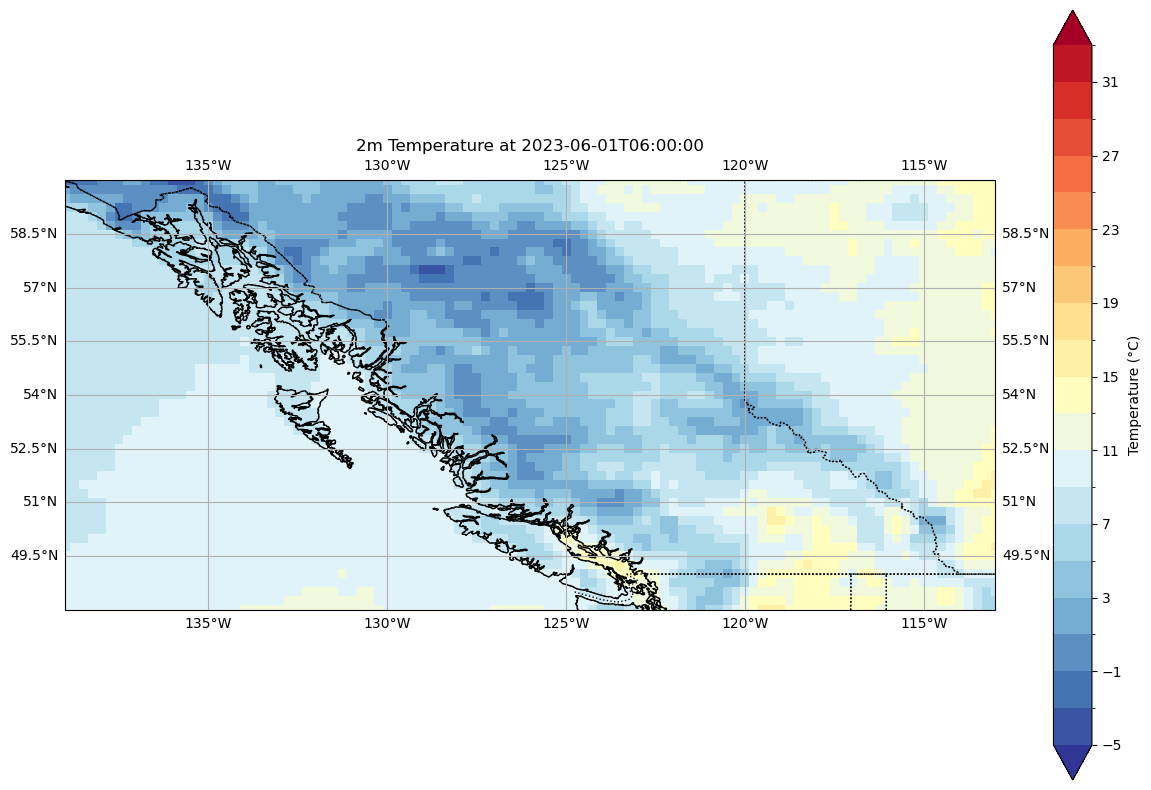

Min temperature: -3.6°C
Max temperature: 16.3°C


In [6]:
# Select 2m temperature at 6 AM on June 1st
time_slice = '2023-06-01T06:00:00'
t2m = ds_instant['t2m'].sel(valid_time=time_slice, method='nearest')

# Convert from Kelvin to Celsius
t2m = t2m - 273.15

# Create figure with map projection
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')

# Create the contour plot
contour = t2m.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='RdYlBu_r',  # Red-Yellow-Blue colormap, reversed
    levels=np.arange(-5, 35, 2),  # Temperature range from -5 to 35°C
    extend='both',
    cbar_kwargs={'label': 'Temperature (°C)'}
)

# Set title
plt.title(f'2m Temperature at {time_slice}')

# Set map extent to match your data area
ax.set_extent([-139, -113, 48, 60], crs=ccrs.PlateCarree())

# Add gridlines
ax.gridlines(draw_labels=True)

plt.show()

# Optional: If you want to see the temperature range to adjust the plot levels
print(f"Min temperature: {float(t2m.min()):.1f}°C")
print(f"Max temperature: {float(t2m.max()):.1f}°C")

# Close the dataset when done
ds_instant.close()

In [7]:
# Show dew point temp
d2m = ds_instant['d2m'].sel(valid_time=time_slice, method='nearest') - 273.15

In [ ]:
# For a different time, e.g., 18:00
time_slice = '2023-06-01T18:00:00'

In [8]:
import xarray as xr
import numpy as np

# List of file paths for June, July, and August
file_paths = [
    'ERA5_2023_06/data_stream-oper_stepType-instant.nc',  # Note: using instant instead of accum for temperature
    'ERA5_2023_07/data_stream-oper_stepType-instant.nc',
    'ERA5_2023_08/data_stream-oper_stepType-instant.nc'
]

# Open and combine all datasets
datasets = []
for file_path in file_paths:
    ds = xr.open_dataset(file_path)
    datasets.append(ds)

# Concatenate along the time dimension
combined_ds = xr.concat(datasets, dim='valid_time')

# Basic information about the combined dataset
print("Combined dataset information:")
print(combined_ds)

# You can save the combined dataset to a new NetCDF file if needed
combined_ds.to_netcdf('ERA5_2023_summer_t2m.nc')

# Close all datasets
for ds in datasets:
    ds.close()
combined_ds.close()

# To verify the data, let's print some basic statistics
print("\nTime period covered:")
print(f"Start: {combined_ds.valid_time.min().values}")
print(f"End: {combined_ds.valid_time.max().values}")
print(f"Number of time steps: {len(combined_ds.valid_time)}")

# Calculate and print summer mean temperature (converting to Celsius)
summer_mean_temp = combined_ds['t2m'].mean(dim='valid_time') - 273.15
print("\nSummer mean temperature (°C):")
print(f"Min: {float(summer_mean_temp.min()):.2f}")
print(f"Max: {float(summer_mean_temp.max()):.2f}")
print(f"Mean: {float(summer_mean_temp.mean()):.2f}")

Combined dataset information:
<xarray.Dataset>
Dimensions:     (valid_time: 368, latitude: 49, longitude: 105)
Coordinates:
    number      int64 0
  * valid_time  (valid_time) datetime64[ns] 2023-06-01 ... 2023-08-31T18:00:00
  * latitude    (latitude) float64 60.0 59.75 59.5 59.25 ... 48.5 48.25 48.0
  * longitude   (longitude) float64 -139.0 -138.8 -138.5 ... -113.2 -113.0
    expver      (valid_time) object '0001' '0001' '0001' ... '0001' '0001'
Data variables:
    d2m         (valid_time, latitude, longitude) float32 271.9 272.3 ... 278.6
    t2m         (valid_time, latitude, longitude) float32 273.3 273.2 ... 286.8
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-11T01:18 GRIB to CDM+CF via cfgrib-0.9.1...

Time period cov

In [9]:
import xarray as xr

# List of file paths
file_paths = [
    'ERA5_2023_06/data_stream-oper_stepType-instant.nc',
    'ERA5_2023_07/data_stream-oper_stepType-instant.nc',
    'ERA5_2023_08/data_stream-oper_stepType-instant.nc'
]

# Open and combine all datasets
datasets = []
for file_path in file_paths:
    # Open each dataset and select only t2m and essential coordinates
    ds = xr.open_dataset(file_path)
    ds_clean = ds[['t2m']].copy()  # Select only t2m variable
    datasets.append(ds_clean)
    ds.close()

# Concatenate along the time dimension
combined_ds = xr.concat(datasets, dim='valid_time')

# Remove unnecessary attributes
combined_ds.attrs = {}  # Clear all dataset attributes

# Save the cleaned dataset
combined_ds.to_netcdf('ERA5_2023_summer_t2m_clean.nc')

# Close the combined dataset
combined_ds.close()

# Verify the new file size
import os
print(f"Original file sizes:")
for path in file_paths:
    print(f"{path}: {os.path.getsize(path)/1024/1024:.2f} MB")
print(f"\nNew file size:")
print(f"ERA5_2023_summer_t2m_clean.nc: {os.path.getsize('ERA5_2023_summer_t2m_clean.nc')/1024/1024:.2f} MB")

: 

c:\Users\jillb\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\jillb\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\jillb\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


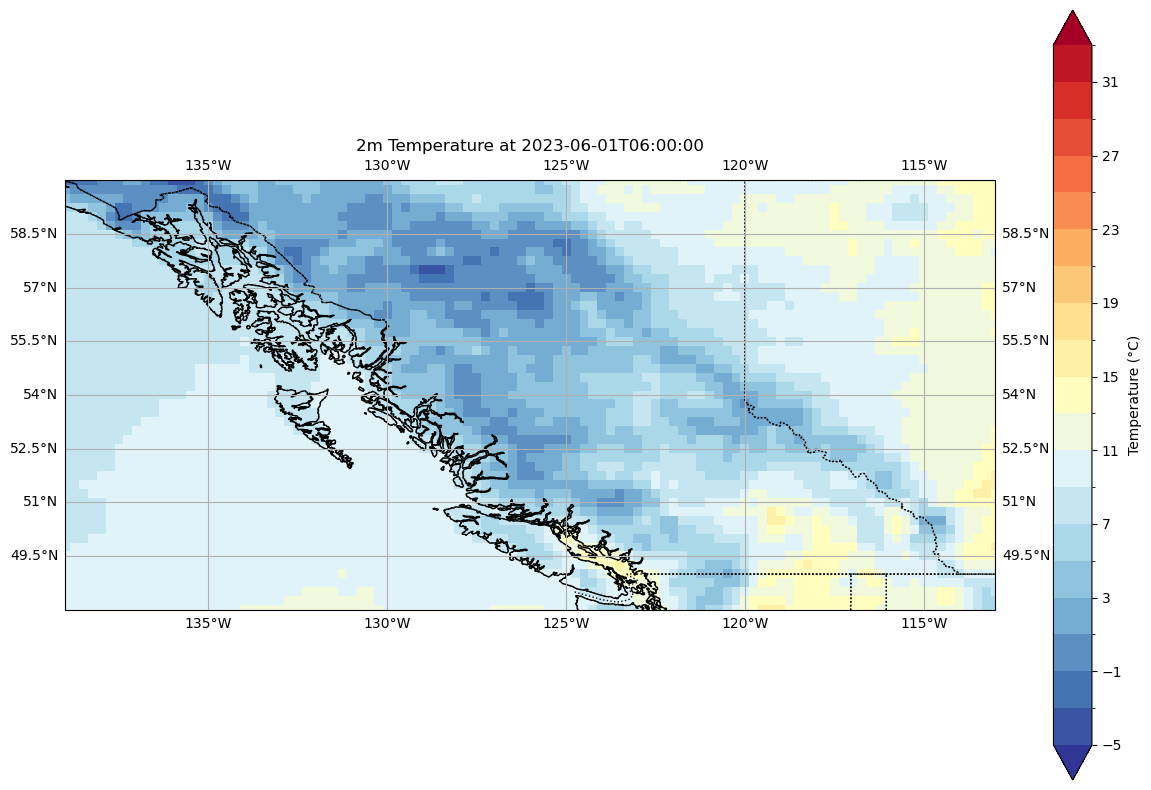

Min temperature: -3.6°C
Max temperature: 16.3°C


In [ ]:
# Select 2m temperature at 6 AM on June 1st
time_slice = '2023-06-01T06:00:00'
t2m = ds_instant['t2m'].sel(valid_time=time_slice, method='nearest')

# Convert from Kelvin to Celsius
t2m = t2m - 273.15

# Create figure with map projection
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')

# Create the contour plot
contour = t2m.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='RdYlBu_r',  # Red-Yellow-Blue colormap, reversed
    levels=np.arange(-5, 35, 2),  # Temperature range from -5 to 35°C
    extend='both',
    cbar_kwargs={'label': 'Temperature (°C)'}
)

# Set title
plt.title(f'2m Temperature at {time_slice}')

# Set map extent to match your data area
ax.set_extent([-139, -113, 48, 60], crs=ccrs.PlateCarree())

# Add gridlines
ax.gridlines(draw_labels=True)

plt.show()

# Optional: If you want to see the temperature range to adjust the plot levels
print(f"Min temperature: {float(t2m.min()):.1f}°C")
print(f"Max temperature: {float(t2m.max()):.1f}°C")

# Close the dataset when done
ds_instant.close()